<br>
<br>

# Brazilian E commerce data set



<br>
<br>



In the following link, you will find the 2016-2018 performance data of a Brazilian e-commerce marketplace called Olist Store, with information from 100K orders: https://www.kaggle.com/olistbr/brazilian-ecommerce. 


Your assignment is to research this data and analyze it using SQL or Excel. 

You are then asked to summarize your top 3 insights from your research, detail your thought process for each insight and present the business logic and the queries you wrote to reach this conclusion. 
 <br>


### 1.  Importing libraries  and  data 
<br>


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from datetime import datetime
from math import radians, cos, sin, asin, sqrt



In [4]:
product_name_transl=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/product_category_name_translation.csv')
products=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_products_dataset.csv')
sellers=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_sellers_dataset.csv')
orders=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_orders_dataset.csv')
orders_review=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_order_reviews_dataset.csv')
orders_payments=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_order_payments_dataset.csv')
orders_items=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_order_items_dataset.csv')
geolocation=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_geolocation_dataset.csv')
customers=pd.read_csv('C://Users//igorm//Downloads/Data_for_MAD/olist_customers_dataset.csv')

### 2. Geting familiar with data and basic info and some preprocessing as well (dealing with missing values)

<br>
In this section I have examined all tables on missing values and did some preprocessing too.

Our data is 100k orders information for a period  2016-2018 in online store called 'Olis Store' in Brasil. Short demographic info about country itself, Brasil (fifth largest country on the planet as well) have a population of around 200 millions, divided into 25 states, Brazil has 22 towns and cities with more than half a million people. Some of them have many more. Some 15.2 million people live in the urban area around and including the city of São Paulo. For Rio de Janeiro, the figure is 9.6 million. Of Brazil's 155 million people, 115 million live in cities. Some 67 million Brazilians live in the country's.
bigest city is Sao Paulo (10 millions),Rio De Janeiro (5,6 millions), Salvador (2 millions)...etc.

I have did some analysis based on sellers, buyers and products. This is all in short since the data gives a lot oportunities for others type of research and analysis but since I do have time limits to complete this project I dicided to concentrate on this three parameters.
<br>

In [5]:
product_name_transl.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


 ...  our first table is product category names, translated from Spanish ... gonna check for missing values 


In [6]:
product_name_transl.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

There is no missing values in any column

 Next one is product table

In [7]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### missing values check as well...


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [9]:
#missing values check
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

620 out of 32900 is somwhere arround two percents so it is acceptable if we want to frop the missing values it will not affect our data behaviour 

 also we can make some conclusions here, there are a lot of unneseccery data for us ( all columns that describes product dimensions and weight...IMHO not important for us) I will drop it right now...


In [10]:
products.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'],axis=1,inplace=True)

In [11]:
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


 Now I am  going to replace spanish with english names...we will simpy merge these two tables

In [12]:
product_id_english=pd.merge(products, product_name_transl)

In [13]:
product_id_english.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery


In [14]:

product_id_english.product_category_name_english.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app


<br>
Here we can see what categories of products do we heave in our data,<br>
its basicaly like an ebay or amazon or aliexpress kind of online wholesalers ...<br>
all the types of stuff that people need from home apliances to the sport and outdoors activities and hobbies and music.<br>
<br>


Next table is sellers table where we can get some info about sellers id, zip code prefix, city and state 

In [15]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

No missing values as well

Orders table give us insight in orders details about time purchase, time when its order approved, order delivered carrier date, and order delivered customer date,estimated delivery 

In [18]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Here we do have some missing values in order delivered carrier date and delivered customer date and thas acceptable ( less than 5 percent)

In [21]:
orders_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
orders_review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### 2.Analysing Sellers data, Top 10 cities and countries by sellers

Here I did some basic analysis about sellers, I group them by country and by the city so we can find where do they come from

In [23]:
sellers_by_state=sellers[["seller_id","seller_state"]].groupby("seller_state").count().sort_values(by=['seller_id'], ascending=False).head(10)
sellers_by_state.reset_index(inplace=True)
sellers_by_state

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


...same thing just visualy

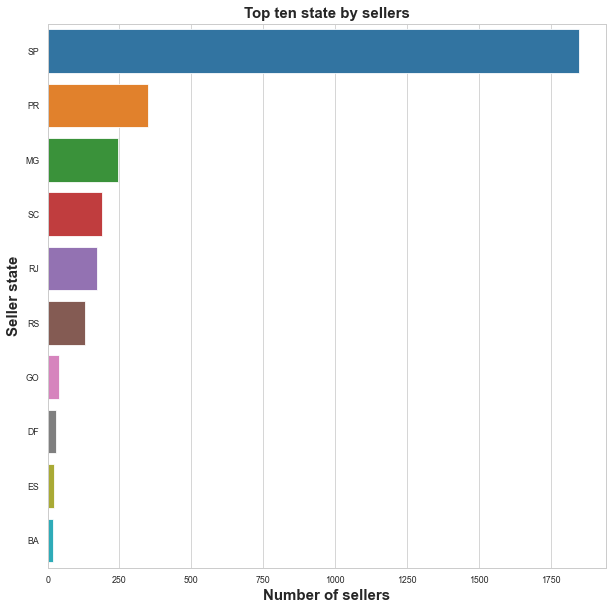

In [24]:
sns.set_context('paper')
sns.set_style("whitegrid")

plt.figure(figsize=(10,10))

sns.barplot(x='seller_id',y='seller_state', data=sellers_by_state.head(10))

plt.title("Top ten state by sellers",fontsize=15, fontweight="bold")
plt.ylabel('Seller state',fontsize=15, fontweight="bold")
plt.xlabel('Number of sellers',fontsize=15, fontweight="bold")
plt.show()

Here we can see that Sao Paolo is on the first place far ahead from the other states with 1849 sellers, second place is Parana with 349 ,and then comes Minas Gerias, Santa Catharina and others like Rio de Janeiro, Rio Grande do Soul.The others are much less significant according to our data.Here we can say that is obviously Sao Polo on the first place since its the bigest state in the country ( 40 millions people out of 190 millions according to some data from the internet)

In [25]:
sellers_by_city=sellers[["seller_id","seller_city"]].groupby("seller_city").count().sort_values(by=['seller_id'], ascending=False).head(10)
sellers_by_city.reset_index(inplace=True)
sellers_by_city

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


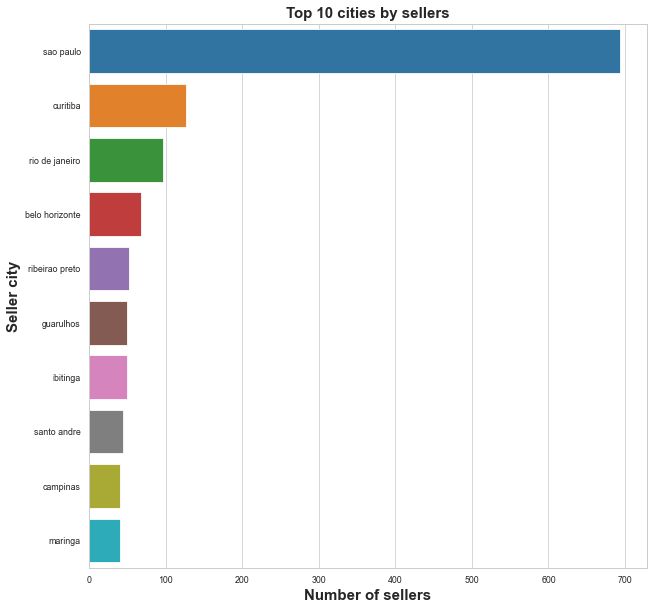

In [26]:
sns.set_context('paper')
sns.set_style("whitegrid")

plt.figure(figsize=(10,10))

sns.barplot(x='seller_id',y='seller_city', data=sellers_by_city.head(25))
plt.title("Top 10 cities by sellers",fontsize=15, fontweight="bold")
plt.ylabel('Seller city',fontsize=15, fontweight="bold")
plt.xlabel('Number of sellers',fontsize=15, fontweight="bold")
plt.show()

Here we can see that the first place goes to the city of Sao Paolo, with 649 sellers , the on the second place but much lower we have Curitiba with 127 and then comes Rio de Janeiro with 96 and the others.

#### 3. Customers data analysis
<br>
<br>
Here we will take a same prinicples like for the sellers, we will check which coutries and cities gives us the most of the customers
<br>
<br>

In [27]:

customers_by_state=customers[["customer_id","customer_state"]].groupby("customer_state").count().sort_values(by=['customer_id'], ascending=False).head(10)
customers_by_state.reset_index(inplace=True)
customers_by_state

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


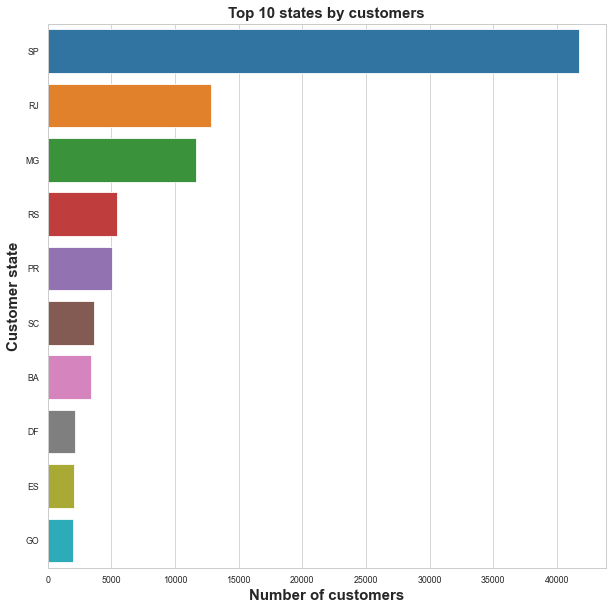

In [28]:
sns.set_context('paper')
sns.set_style("whitegrid")

plt.figure(figsize=(10,10))

sns.barplot(x='customer_id',y='customer_state', data=customers_by_state.head(25))
plt.title("Top 10 states by customers",fontsize=15, fontweight="bold")
plt.ylabel('Customer state',fontsize=15, fontweight="bold")
plt.xlabel('Number of customers',fontsize=15, fontweight="bold")
plt.show()

<br>
The results are almost the some like with the sellers data, most of the customers are coming from the bigest state in the country Sao Paolo ( arround 40 thousand customers), then we have Rio de Janeiro ( 12 thousand ),and then Minas Gerais with 11 thousand customers, and then also big fall to the arround 5 thousand customers.Same conclusion like in the previous chapter, most of the customers are coming from the bigest states.
<br>


Now we will do the same analysis but for the cities instead of states...
<br>
<br>

In [29]:
#we will do the same only for the cities to find out which are the cities that have most of the customers from our data
customers_city=customers[["customer_id","customer_city"]].groupby("customer_city").count().sort_values(by=['customer_id'], ascending=False).head(25)
customers_city.reset_index(inplace=True)
customers_city.head(10)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


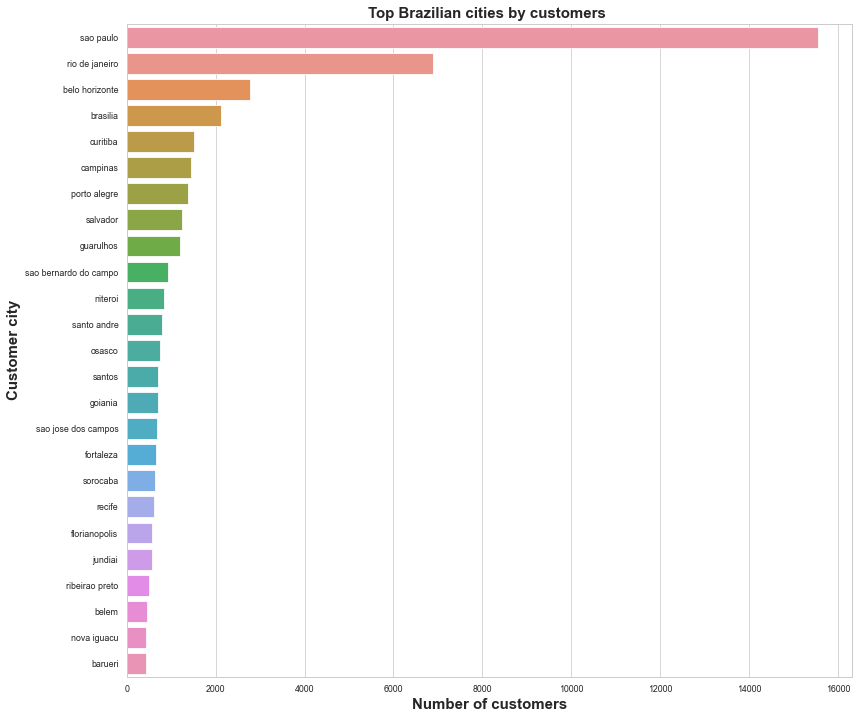

In [30]:
sns.set_context('paper')
sns.set_style("whitegrid")

plt.figure(figsize=(13,12))

sns.barplot(x='customer_id',y='customer_city', data=customers_city.head(25))
plt.title("Top Brazilian cities by customers ",fontsize=15, fontweight="bold")
plt.ylabel('Customer city',fontsize=15, fontweight="bold")
plt.xlabel('Number of customers',fontsize=15, fontweight="bold")
plt.show()

<br>
Sao Paolo very strong first place far forward with 15540 customers,<br>
then we have Rio de Janeiro holding a second place with only 6882 customers, <br>
and then comes Belo horizonte with only 2773 customers and other cities with much less customers...<br>
same thing like with the states, most of the customers are located in the big cities.<br>
<br>

### 3. Orders data analysis
<br>

Before we start this we need to  to change all date related columns (in orders table)<br>
to appropriate format so that we can analyze it as it should be, since they need to be in date format.<br>
(from non-null objects to datetime64)
<br>
<br>

In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders['order_purchase_timestamp'] =  pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] =  pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] =  pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] =  pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [33]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


 <br>
 <br>
 
 Now we will group orders by Week, Months and Years, and  we will calculate metrics by grouping data by session date/ week.
 
 DAU,WAU and MAU ( daily, weekly and monthly active users) but first we need to extract month and year for every order purchase
<br>
<br>

In [34]:
orders['purchase_hour']=orders['order_purchase_timestamp'].dt.hour

orders['purchase_day']=orders['order_purchase_timestamp'].dt.dayofweek
orders['purchase_week']=orders['order_purchase_timestamp'].dt.week
orders['purchase_month']=orders['order_purchase_timestamp'].dt.month
orders['purchase_year']=orders['order_purchase_timestamp'].dt.year


In [35]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_hour,purchase_day,purchase_week,purchase_month,purchase_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,0,40,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20,1,30,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,2,32,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,19,5,46,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21,1,7,2,2018


In [57]:
orders.order_purchase_timestamp.min()

Timestamp('2018-10-17 17:30:18')

In [58]:

orders.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')




 Now we will calculate metrics by grouping data by session date/ week/ month
 <br>
 <br>



In [36]:
dau_total=orders.groupby('order_purchase_timestamp').agg({'customer_id':'nunique'}).mean()
wau_total = orders.groupby(['purchase_year','purchase_week']).agg({'customer_id': 'nunique'}).mean()
mau_total=orders.groupby(['purchase_year','purchase_month']).agg({'customer_id': 'nunique'}).mean()


In [37]:
print('The number of daily active (unique )users :',int(dau_total))


The number of daily active (unique )users : 1


In [38]:
print('the number of weekly active (unique) users:',int(wau_total))

the number of weekly active (unique) users: 984


In [39]:
print('The number of monthly active (unique )users :',int(mau_total))


The number of monthly active (unique )users : 3977


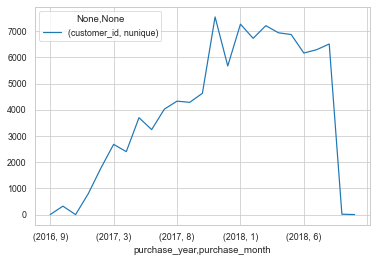

In [40]:
buy_per_user=orders.groupby(['purchase_year','purchase_month']).agg({'customer_id':['nunique']})
buy_per_user.head(40).plot();


In [41]:
orders.pivot_table(values = 'order_id', index = 'purchase_year', aggfunc='count')


,order_id
purchase_year,
2016,329
2017,45101
2018,54011


From plot above and pivot table we can see what was the trend in sales during the following period of time,in a 2016. only 329 (that can be explained with that that our first date is from september 2016) in a 2017 45101 and in the 2018. 54011


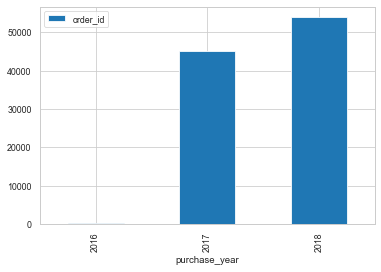

In [42]:
orders.pivot_table(values = 'order_id', index ='purchase_year', aggfunc='count').plot(kind='bar');


In [43]:
#Here I am adding the product id table to the orders_items so we can get more insight about sales 
orders_items1=orders_items.merge(product_id_english, on='product_id').reset_index()
orders_items1.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,cool_stuff
1,1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,cool_stuff
2,2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,cool_stuff
3,3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,cool_stuff
4,4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,cool_stuff


#### 4. Top ten best selling categories

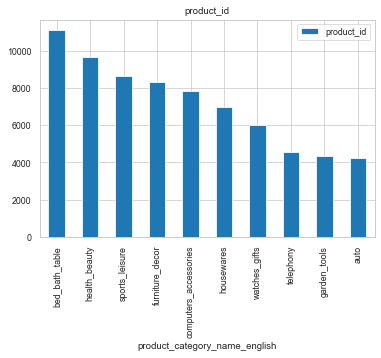

In [44]:
top_categories=orders_items1.pivot_table(values = 'product_id', index ='product_category_name_english', aggfunc='count').sort_values('product_id',ascending=False).head(10)

top_categories.plot(kind='bar',subplots=True);



In [45]:
#top_products=orders_items1[["product_id","product_category_name_english"]].groupby("product_category_name_english").count().sort_values(by=['product_id'], ascending=False).head(10)


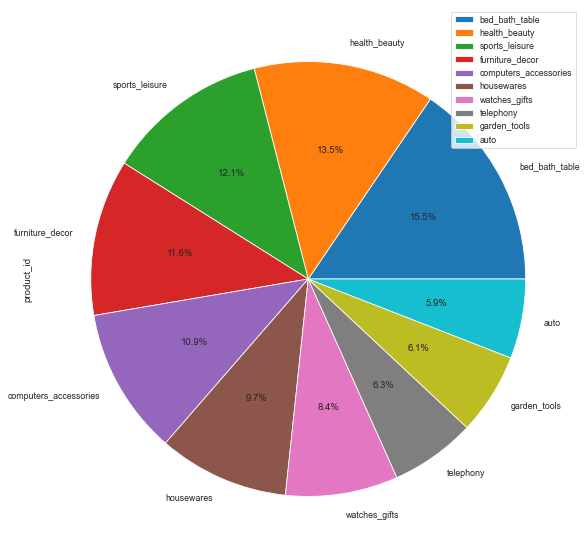

In [46]:
top_categories.plot(figsize=(10,10),subplots=True, kind='pie',autopct='%1.1f%%');


<br>
Here we can see that best selling products are from: Bed Bath Table, then we have Health Beauty, and Sport and Leisure,Furniture Decor, Computer accesories etc.
<br>


In [47]:
monthly_sales = orders.groupby('purchase_month')['order_purchase_timestamp'].count()
monthly_sales.head()

purchase_month
1     8069
2     8508
3     9893
4     9343
5    10573
Name: order_purchase_timestamp, dtype: int64

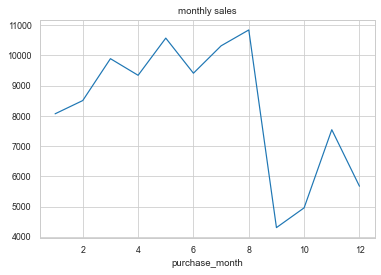

In [48]:
monthly_sales.plot(title='monthly sales');

In [49]:
orders.groupby('purchase_year')['order_purchase_timestamp'].count()

purchase_year
2016      329
2017    45101
2018    54011
Name: order_purchase_timestamp, dtype: int64

In [50]:
#I made separation by year
orders2016=orders[orders.purchase_year==2016]
orders2017=orders[orders.purchase_year==2017]
orders2018=orders[orders.purchase_year==2018]

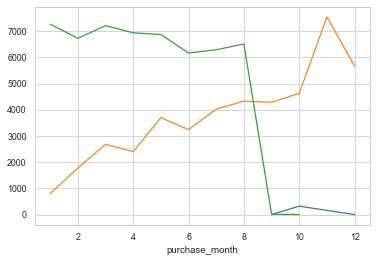

In [51]:
orders2016.groupby('purchase_month')['order_purchase_timestamp'].count().plot();
orders2017.groupby('purchase_month')['order_purchase_timestamp'].count().plot();
orders2018.groupby('purchase_month')['order_purchase_timestamp'].count().plot();


<br>
Blue line represent 2016, yellow is 2017 and green is 2018, we can see that 2016 was very bad in terms of sales, but 2017 was very good with rising trend in sales, also 2018 very good for a first eight months and then sudden drop almost without no sales...
<br>

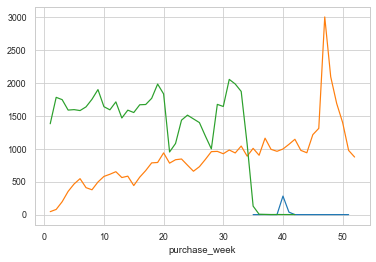

In [59]:
orders2016.groupby('purchase_week')['order_purchase_timestamp'].count().plot();
orders2017.groupby('purchase_week')['order_purchase_timestamp'].count().plot();
orders2018.groupby('purchase_week')['order_purchase_timestamp'].count().plot();

<br>
When we take a look at same data but grouped by week instead of years we have much biger peak <br>
at arround 47-48 week of the 2016, I might say that this is caused by Christmass Holidays and New Years Eve as well.
<br>
<br>

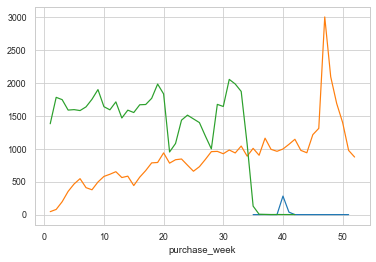

In [53]:
orders2016.groupby('purchase_week')['order_purchase_timestamp'].count().plot();
orders2017.groupby('purchase_week')['order_purchase_timestamp'].count().plot();
orders2018.groupby('purchase_week')['order_purchase_timestamp'].count().plot();

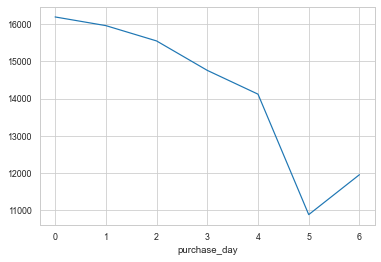

In [54]:
orders.groupby('purchase_day')['order_purchase_timestamp'].count().plot();


<br>
Here I wanted to find which day of the week is best by sales, <br>
and it looks like the Sunday and begining of the week is favorite shoping time online<br>
and then after Tuesday to Wendsday is slightly less interesting and then from the Thursday to Friday very bad time...
<br>

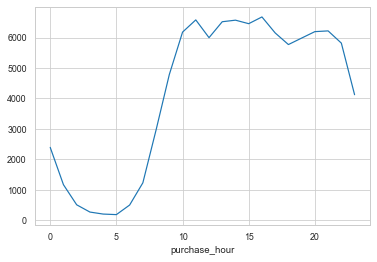

In [55]:
orders.groupby('purchase_hour')['order_purchase_timestamp'].count().plot();


<br>
Here we can see shoping behaviour on a daily basis, best shoping hours are from 10 to 21...<br>

it might be interesting for planing sellers campaings and promotions...to take this info in account when planing their

activities...

Thats would be my short take on this data set, we have made some basic conclusions related to sellers, custiomers and orders for the given online shop.

Our final conclusion would be that most of the buyers and sellers are coming from the highly populated area and cities.

Most popular product groups are: bed bath tables ( whatever this is), health and Beauty, and Sports Leisure...

Best selling time of the year is end of the Year,

best selling days are Sunday and begining of the Week,

and best selling hours are morning to evening Hours.



Thats what I can say in short, this data set giving oppurtunity for tons of analysis but since I have time limits for 

completing this project that would be all for now.

Thanks for taking Your time and effort to read this.